# 事後分布
$y\sim dpois(\theta)$、$\theta\sim dgamma(s,r)$とし、n個のポアソン分布に従う変数で事後分布を計算するものとする。
$$
\begin{align}
p(\theta|y)&=\frac{p(y_1,\cdots,y_n|\theta)p(\theta)}{p(y_1,\cdots,y_n)} \\
    &=\frac{1}{p(y_1,\cdots,y_n)}\frac{1}{y_1!}\theta^{y_1}e^{-\theta},\cdots,\frac{1}{y_n!}\theta^{y_n}e^{-\theta}\frac{r^s}{\Gamma(s)}\theta^{s-1}e^{-r\theta}\\
&=C\theta^{\Sigma y_i+s-1}e^{-(n+r)\theta}\\
\end{align}
$$

$C$は$\theta$に関係のない定数である。

$$
\begin{align}
1 &= C\int_{0}^{\infty}\theta^{\Sigma y_i+s-1}e^{-(n+r)\theta}d\theta \\
\end{align}
$$

$\theta = \frac{\lambda}{n+r}$として、

$$
\begin{align}
1 &= C\int_{0}^{\infty}\left(\frac{\lambda}{n+r}\right)^{\Sigma y_i+s-1}e^{-\lambda}\left(\frac{1}{n+r}\right)d\lambda \\
&= C\frac{1}{(n+r)^{\Sigma y_i+s}}\int_{0}^{\infty}\lambda^{\Sigma y_i+s-1}e^{-\lambda}d\lambda\\
&= C\frac{1}{(n+r)^{\Sigma y_i+s}}\Gamma(\Sigma y_i+s) \\
C&=\frac{(n+r)^{\Sigma y_i+s}}{\Gamma(\Sigma y_i+s)} \\
\end{align}
$$
これをもとの式に代入して、
$$
\begin{align}
p(\theta|y)&=\frac{(n+r)^{\Sigma y_i+s}}{\Gamma(\Sigma y_i+s)}\theta^{\Sigma y_i+s-1}e^{-(n+r)\theta} \\
&=dgamma(\Sigma y_i+s,n+r)
\end{align}
$$

[1] "事前分布の平均=6.400000,分散=12.800000,最瀕値=4.400000"

[1] "ポアソン乱数の平均=2.900000,分散=2.322222"

[1] "事後分布の平均=3.066667,分散=0.292063,最瀕値=2.971429"

[1] "事後分布の95%信頼区間 2.100315 ~ 4.213021"

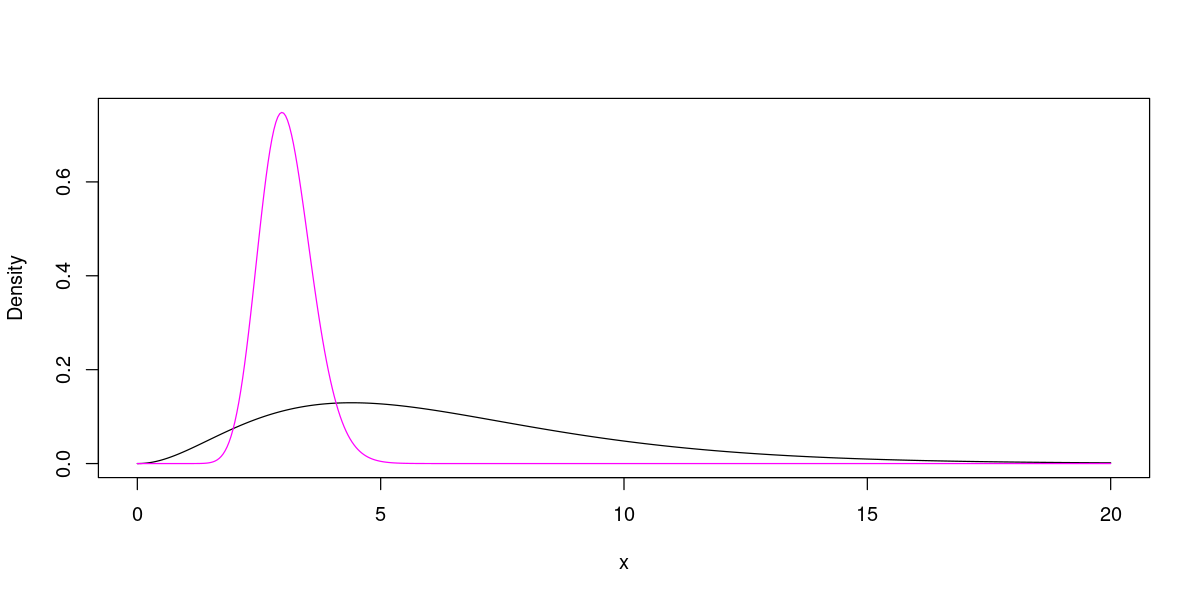

In [1]:
# ポアソン分布モデル
# 乱数でポアソン分布に従うデータを取得
prior.shape <- 3.2
prior.rate  <- 0.5
dgamma.mean <- function(shape,rate) shape/rate
dgamma.var  <- function(shape,rate) shape/rate/rate
dgamma.mode <- function(shape,rate) (shape-1)/rate
# ポアソン分布に従う乱数を生成
set.seed(12345)
rpois.N <- 10
rpois.param <- 2
rpois.data <- rpois(rpois.N, rpois.param)
# 事後分布
posterior.shape <- prior.shape + sum(rpois.data)
posterior.rate <- prior.rate + rpois.N
# 事前分布と事後分布のグラフを描画
xs <- seq(0, 20, length.out=500)
prior.ys <- dgamma(xs, prior.shape, prior.rate)
posterior.ys <- dgamma(xs, posterior.shape, posterior.rate)
ylim.max <- max(max(prior.ys), max(posterior.ys))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)
plot(xs,
     prior.ys,
     type="l",
     ylim=c(0,ylim.max),
     col="black",
     xlab="x",
     ylab="Density")
lines(xs, posterior.ys, col="magenta")
# 平均と分散
sprintf("事前分布の平均=%f,分散=%f,最瀕値=%f", 
        dgamma.mean(prior.shape, prior.rate),
        dgamma.var(prior.shape, prior.rate),
        dgamma.mode(prior.shape, prior.rate))
sprintf("ポアソン乱数の平均=%f,分散=%f", mean(rpois.data), var(rpois.data))
sprintf("事後分布の平均=%f,分散=%f,最瀕値=%f",
        dgamma.mean(posterior.shape, posterior.rate),
        dgamma.var(posterior.shape, posterior.rate),
        dgamma.mode(posterior.shape, posterior.rate))
sprintf("事後分布の95%%信頼区間 %f ~ %f",
        qgamma(0.025, posterior.shape, posterior.rate),
        qgamma(0.975, posterior.shape, posterior.rate))

# 事後予測分布
$y_{new}\sim dpois(\theta)$として、

$$
\begin{align}
p(y_{new}|\Sigma y_i) &= \int_{0}^{\infty}p(y_{new}|\theta)p(\theta|\Sigma y_i)d\theta \\
&= \int_{0}^{\infty}\frac{\theta^{y_{new}}e^{-\theta}}{y_{new}!}\frac{(n+r)^{\Sigma y_i+s}}{\Gamma(\Sigma y_i+s)}\theta^{\Sigma y_i+s-1}e^{-(n+r)\theta}\\
&=\frac{(n+r)^{\Sigma y_i+s}}{y_{new}!\Gamma(\Sigma y_i+s)}\int_{0}^{\infty}\theta^{y_{new}+\Sigma y_i+s-1}e^{-(1+n+r)\theta}d\theta \\
\end{align}
$$

$\theta=\frac{\lambda}{1+n+r}$として、

$$
\begin{align}
&=\frac{(n+r)^{\Sigma y_i+s}}{y_{new}!\Gamma(\Sigma y_i+s)}\int_{0}^{\infty}\left(\frac{\lambda}{1+n+r}\right)^{y_{new}+\Sigma y_i+s-1}e^{-\lambda}\frac{1}{1+n+r}d\lambda \\
%
&=\frac{(n+r)^{\Sigma y_i+s}}{y_{new}!\Gamma(\Sigma y_i+s)}\frac{1}{(1+n+r)^{y_{new}+\Sigma y_i+s}}\int_{0}^{\infty}\lambda^{y_{new}+\Sigma y_i+s-1}e^{-\lambda}d\lambda \\
%
&=\frac{(n+r)^{\Sigma y_i+s}}{y_{new}!\Gamma(\Sigma y_i+s)}\frac{1}{(1+n+r)^{y_{new}+\Sigma y_i+s}}\Gamma(y_{new}+\Sigma y_i+s)\\
%
&=\frac{\Gamma(y_{new}+\Sigma y_i+s)}{y_{new}!\Gamma(\Sigma y_i+s)}\frac{(n+r)^{\Sigma y_i+s}}{(1+n+r)^{y_{new}+\Sigma y_i+s}}\\
%
&=\frac{\Gamma(y_{new}+\Sigma y_i+s)}{y_{new}!\Gamma(\Sigma y_i+s)}\left(\frac{n+r}{1+n+r}\right)^{\Sigma y_i+s}\left(\frac{1}{1+n+r}\right)^{y_{new}}\\
%
&=\frac{\Gamma(y_{new}+\Sigma y_i+s)}{y_{new}!\Gamma(\Sigma y_i+s)}\left(\frac{n+r}{1+n+r}\right)^{\Sigma y_i+s}\left(\frac{1+n+r}{1+n+r}-\frac{n+r}{1+n+r}\right)^{y_{new}}\\
%
&=\frac{\Gamma(y_{new}+\Sigma y_i+s)}{y_{new}!\Gamma(\Sigma y_i+s)}\left(\frac{n+r}{1+n+r}\right)^{\Sigma y_i+s}\left(1-\frac{n+r}{1+n+r}\right)^{y_{new}}\\
%
&=dnbinom\left(y_{new}, y_{new}+\Sigma y_i+s, \frac{n+r}{1+n+r}\right)
\end{align}
$$
事後予測分布は負の二項分布となる。ただし、ガンマ関数が用いられsizeパラメータに実数も使用できる形である。

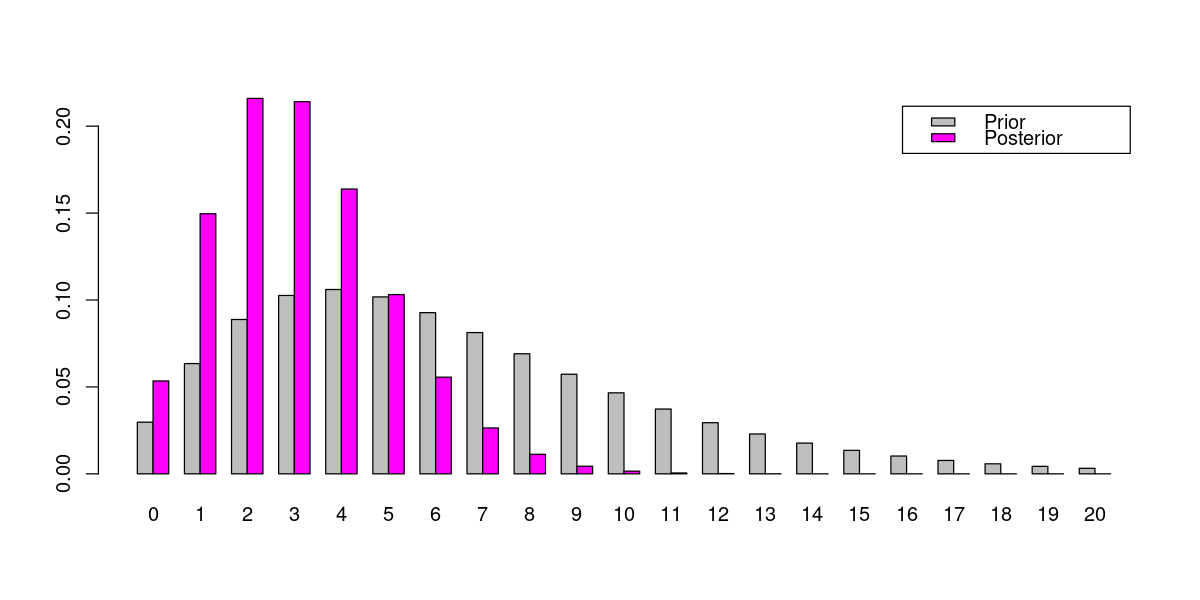

In [2]:
#事後予測分布
dpred.xs = 0:20
dpred.prior = dnbinom(dpred.xs, prior.shape, prior.rate/(prior.rate+1))
dpred.posterior = dnbinom(dpred.xs, posterior.shape, posterior.rate/(posterior.rate+1))

barplot(height = rbind(dpred.prior,dpred.posterior),
        beside = TRUE,
        names.arg = 0:20,
        col = c("gray", "magenta"),
        legend.text = c("Prior", "Posterior"))